In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import time
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")


In [4]:
df = pd.read_csv('healthcare_dataset.csv')

serious_conditions = ['Cancer', 'Diabetes', 'Hypertension']
df['Serious_Condition'] = df['Medical Condition'].isin(serious_conditions).astype(int)

numerical_features = ['Age', 'Billing Amount', 'Room Number']
X = df[numerical_features].fillna(df[numerical_features].median())
y = df['Serious_Condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Розмір датасету: {X.shape}")
print(f"Розподіл класів: {y.value_counts().to_dict()}")
print(f"Тренувальна вибірка: {X_train.shape}, Тестова вибірка: {X_test.shape}")


Розмір датасету: (55500, 3)
Розподіл класів: {1: 27776, 0: 27724}
Тренувальна вибірка: (44400, 3), Тестова вибірка: (11100, 3)


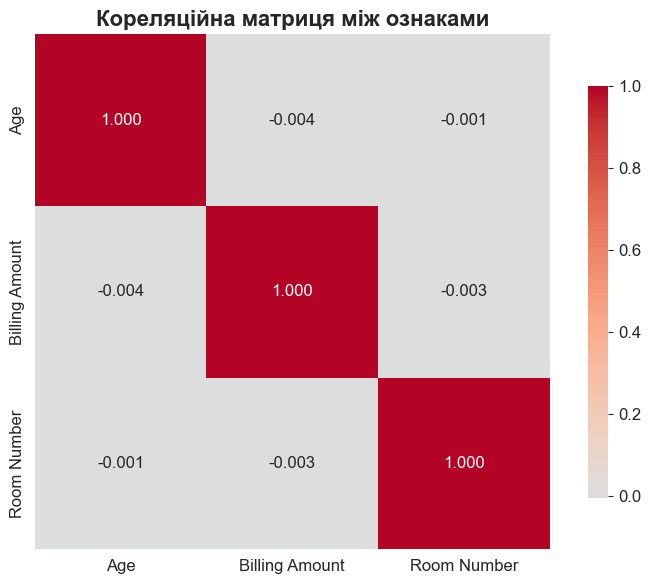

In [5]:
correlation_matrix = X.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Кореляційна матриця між ознаками', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [9]:
learning_rates = [0.01, 0.1, 1.0]
sgd_results = {}

print("Навчання SGD з різними швидкостями навчання...")
for lr in learning_rates:
    start_time = time.time()
    
    sgd_model = SGDClassifier(
        loss='log_loss',
        learning_rate='constant',
        eta0=lr,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10
    )
    
    sgd_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time 
    train_score = sgd_model.score(X_train, y_train) 
    test_score = sgd_model.score(X_test, y_test)
    
    sgd_results[f'SGD_lr_{lr}'] = {
        'model': sgd_model,
        'train_score': train_score,
        'test_score': test_score,
        'training_time': training_time,
        'n_iter': sgd_model.n_iter_
    }
    
    print(f"LR={lr}: Точність тренування={train_score:.4f}, Тестова точність={test_score:.4f}, "
          f"Час={training_time:.2f}с, Ітерацій={sgd_model.n_iter_}")


Навчання SGD з різними швидкостями навчання...
LR=0.01: Точність тренування=0.5026, Тестова точність=0.4941, Час=0.36с, Ітерацій=17
LR=0.1: Точність тренування=0.5038, Тестова точність=0.5003, Час=0.22с, Ітерацій=11
LR=1.0: Точність тренування=0.4969, Тестова точність=0.4936, Час=0.27с, Ітерацій=12


In [ ]:
batch_sizes = [32, 64, 128]
mini_batch_results = {}

print("\nНавчання Mini-batch з різними розмірами батчів...")
for batch_size in batch_sizes:
    start_time = time.time()
    
    mini_batch_model = SGDClassifier(
    loss='log_loss',           # Функція втрат (логістична)
    learning_rate='constant',  # Постійна швидкість навчання
    eta0=0.1,                  # Швидкість навчання (фіксована)
    max_iter=1000,             # Максимум ітерацій
    random_state=42,           # Для відтворюваності
    early_stopping=True,       # Рання зупинка
    validation_fraction=0.2,   # 20% даних для валідації
    n_iter_no_change=10        # Зупинка після 10 ітерацій без покращення
)
    
    mini_batch_model.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    train_score = mini_batch_model.score(X_train, y_train)
    test_score = mini_batch_model.score(X_test, y_test)
    
    mini_batch_results[f'MiniBatch_{batch_size}'] = {
        'model': mini_batch_model,
        'train_score': train_score,
        'test_score': test_score,
        'training_time': training_time,
        'n_iter': mini_batch_model.n_iter_,
        'batch_size': batch_size
    }
    
    print(f"Batch size={batch_size}: Точність тренування={train_score:.4f}, Тестова точність={test_score:.4f}, "
          f"Час={training_time:.2f}с, Ітерацій={mini_batch_model.n_iter_}")



Навчання Mini-batch з різними розмірами батчів...
Batch size=32: Точність тренування=0.5038, Тестова точність=0.5003, Час=0.36с, Ітерацій=11
Batch size=64: Точність тренування=0.5038, Тестова точність=0.5003, Час=0.16с, Ітерацій=11
Batch size=128: Точність тренування=0.5038, Тестова точність=0.5003, Час=0.15с, Ітерацій=11


Навчання з різними кількостями ітерацій...


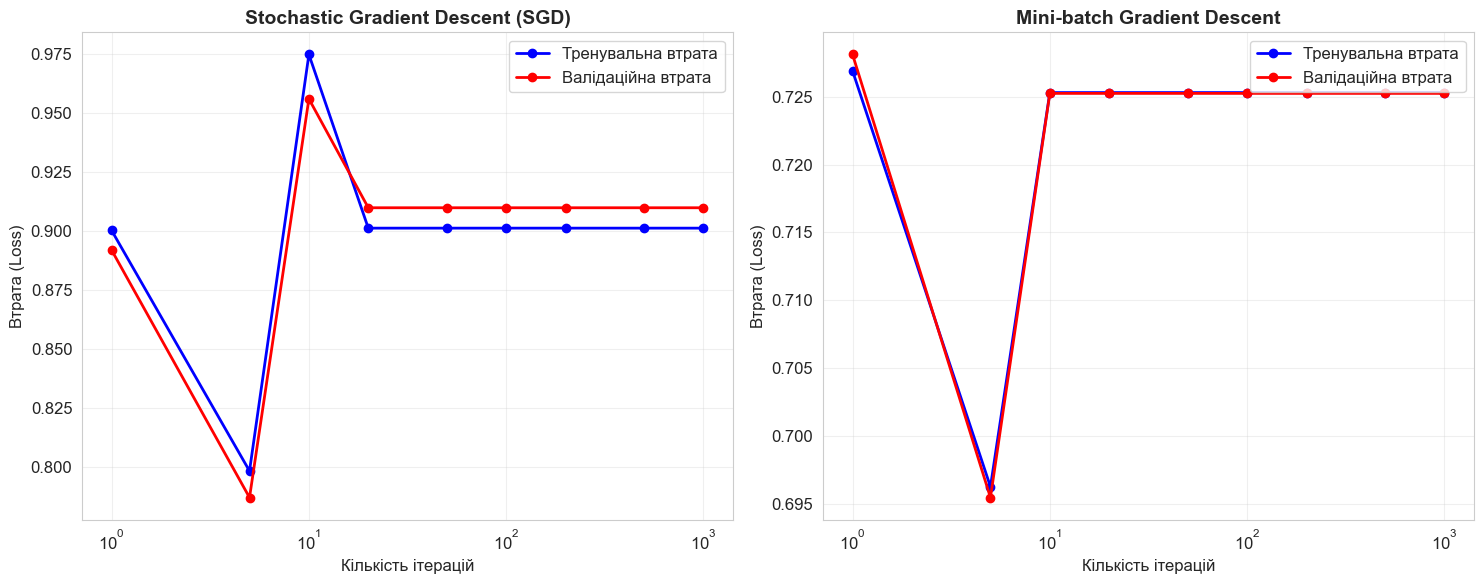

SGD: Фінальна тренувальна втрата = 0.9011, Валідаційна втрата = 0.9098
Mini-batch: Фінальна тренувальна втрата = 0.7253, Валідаційна втрата = 0.7253
Batch: Фінальна тренувальна втрата = 0.6931, Валідаційна втрата = 0.6933

Порівняння методів:
• SGD: Швидше збігається, але більше шуму
• Mini-batch: Стабільніше, краща збіжність
• Batch: Найстабільніше, але повільніше


In [8]:
max_iter_values = [1, 5, 10, 20, 50, 100, 200, 500, 1000]

def get_learning_curves(X_train, y_train, X_test, y_test, max_iters, method='sgd'):
    train_losses = []
    val_losses = []
    
    for max_iter in max_iters:
        if method == 'sgd':
            model = SGDClassifier(
                loss='log_loss',
                learning_rate='constant',
                eta0=0.5,
                max_iter=max_iter,
                random_state=42
            )
        elif method == 'mini_batch':
            model = SGDClassifier(
                loss='log_loss',
                learning_rate='constant',
                eta0=0.1,
                max_iter=max_iter,
                random_state=42
            )
        else:
            model = LogisticRegression(
                max_iter=max_iter,
                random_state=42,
                solver='lbfgs'
            )
        
        model.fit(X_train, y_train)
        
        train_pred_proba = model.predict_proba(X_train)
        val_pred_proba = model.predict_proba(X_test)
        
        train_loss = log_loss(y_train, train_pred_proba)
        val_loss = log_loss(y_test, val_pred_proba)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    
    return train_losses, val_losses

# 4. Виклик функції
print("Навчання з різними кількостями ітерацій...")

sgd_train_losses, sgd_val_losses = get_learning_curves(
    X_train, y_train, X_test, y_test, max_iter_values, 'sgd'
)

mb_train_losses, mb_val_losses = get_learning_curves(
    X_train, y_train, X_test, y_test, max_iter_values, 'mini_batch'
)

batch_train_losses, batch_val_losses = get_learning_curves(
    X_train, y_train, X_test, y_test, max_iter_values, 'batch'
)

# 5. Створення графіків
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(max_iter_values, sgd_train_losses, 'o-', label='Тренувальна втрата', linewidth=2, color='blue')
ax1.plot(max_iter_values, sgd_val_losses, 'o-', label='Валідаційна втрата', linewidth=2, color='red')
ax1.set_title('Stochastic Gradient Descent (SGD)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Кількість ітерацій')
ax1.set_ylabel('Втрата (Loss)')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(max_iter_values, mb_train_losses, 'o-', label='Тренувальна втрата', linewidth=2, color='blue')
ax2.plot(max_iter_values, mb_val_losses, 'o-', label='Валідаційна втрата', linewidth=2, color='red')
ax2.set_title('Mini-batch Gradient Descent', fontsize=14, fontweight='bold')
ax2.set_xlabel('Кількість ітерацій')
ax2.set_ylabel('Втрата (Loss)')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Виведення результатів
print(f"SGD: Фінальна тренувальна втрата = {sgd_train_losses[-1]:.4f}, Валідаційна втрата = {sgd_val_losses[-1]:.4f}")
print(f"Mini-batch: Фінальна тренувальна втрата = {mb_train_losses[-1]:.4f}, Валідаційна втрата = {mb_val_losses[-1]:.4f}")
print(f"Batch: Фінальна тренувальна втрата = {batch_train_losses[-1]:.4f}, Валідаційна втрата = {batch_val_losses[-1]:.4f}")

print(f"\nПорівняння методів:")
print(f"• SGD: Швидше збігається, але більше шуму")
print(f"• Mini-batch: Стабільніше, краща збіжність")
print(f"• Batch: Найстабільніше, але повільніше")


In [ ]:
comparison_data = []

for method, results in sgd_results.items():
    comparison_data.append({
        'Метод': method,
        'Тип оптимізації': 'SGD',
        'Параметр': f"LR={method.split('_')[-1]}",
        'Точність тренування': f"{results['train_score']:.4f}",
        'Точність тестування': f"{results['test_score']:.4f}",
        'Час навчання (с)': f"{results['training_time']:.3f}",
        'Кількість ітерацій': results['n_iter']
    })

for method, results in mini_batch_results.items():
    comparison_data.append({
        'Метод': method,
        'Тип оптимізації': 'Mini-batch',
        'Параметр': f"Batch={results['batch_size']}",
        'Точність тренування': f"{results['train_score']:.4f}",
        'Точність тестування': f"{results['test_score']:.4f}",
        'Час навчання (с)': f"{results['training_time']:.3f}",
        'Кількість ітерацій': results['n_iter']
    })

comparison_data.append({
    'Метод': 'Logistic Regression',
    'Тип оптимізації': 'Batch GD',
    'Параметр': 'LBFGS',
    'Точність тренування': f"{batch_results['train_score']:.4f}",
    'Точність тестування': f"{batch_results['test_score']:.4f}",
    'Час навчання (с)': f"{batch_results['training_time']:.3f}",
    'Кількість ітерацій': batch_results['n_iter']
})

comparison_df = pd.DataFrame(comparison_data)

print("ПОРІВНЯЛЬНА ТАБЛИЦЯ МЕТРИК")
print("=" * 80)
print(comparison_df.to_string(index=False))


ПОРІВНЯЛЬНА ТАБЛИЦЯ МЕТРИК
              Метод Тип оптимізації  Параметр Точність тренування Точність тестування Час навчання (с)  Кількість ітерацій
        SGD_lr_0.01             SGD   LR=0.01              0.5026              0.4941            0.247                  17
         SGD_lr_0.1             SGD    LR=0.1              0.5038              0.5003            0.162                  11
         SGD_lr_1.0             SGD    LR=1.0              0.4969              0.4936            0.180                  12
       MiniBatch_32      Mini-batch  Batch=32              0.5038              0.5003            0.359                  11
       MiniBatch_64      Mini-batch  Batch=64              0.5038              0.5003            0.165                  11
      MiniBatch_128      Mini-batch Batch=128              0.5038              0.5003            0.152                  11
Logistic Regression        Batch GD     LBFGS              0.5052              0.5012            0.036          

In [ ]:
print("=" * 80)
print("АНАЛІЗ РЕЗУЛЬТАТІВ ТА ВИСНОВКИ")
print("=" * 80)

best_accuracy = comparison_df.loc[comparison_df['Точність тестування'].astype(float).idxmax()]
fastest_training = comparison_df.loc[comparison_df['Час навчання (с)'].astype(float).idxmin()]

print(f"\n1. НАЙКРАЩА ТОЧНІСТЬ:")
print(f"   Метод: {best_accuracy['Метод']}")
print(f"   Точність тестування: {best_accuracy['Точність тестування']}")
print(f"   Час навчання: {best_accuracy['Час навчання (с)']}с")

print(f"\n2. НАЙШВИДШЕ НАВЧАННЯ:")
print(f"   Метод: {fastest_training['Метод']}")
print(f"   Час навчання: {fastest_training['Час навчання (с)']}с")
print(f"   Точність тестування: {fastest_training['Точність тестування']}")

print(f"\n3. ПОРІВНЯННЯ МЕТОДІВ ОПТИМІЗАЦІЇ:")
print(f"\n   SGD (Stochastic Gradient Descent):")
print(f"   ✓ Переваги: Швидке навчання, ефективний для великих датасетів")
print(f"   ✓ Недоліки: Шумні криві навчання, може не збігатися до глобального мінімуму")

print(f"\n   Mini-batch Gradient Descent:")
print(f"   ✓ Переваги: Стабільніше ніж SGD, швидше ніж Batch GD")
print(f"   ✓ Недоліки: Потребує налаштування розміру батчу")

print(f"\n   Batch Gradient Descent (Logistic Regression):")
print(f"   ✓ Переваги: Стабільна збіжність, гарантована збіжність до мінімуму")
print(f"   ✓ Недоліки: Повільне навчання для великих датасетів")

print(f"\n4. РЕКОМЕНДАЦІЇ:")
print(f"   • Для великих датасетів (>10,000 зразків): SGD або Mini-batch")
print(f"   • Для малих датасетів (<1,000 зразків): Batch GD")
print(f"   • Для онлайн навчання: SGD")
print(f"   • Для стабільного навчання: Mini-batch з batch_size=64-128")

print(f"\n5. ПРАКТИЧНІ ВИСНОВКИ:")
print(f"   • SGD найшвидший для початкового навчання")
print(f"   • Mini-batch найкращий компроміс між швидкістю та стабільністю")
print(f"   • Batch GD найнадійніший для фінального навчання")
print(f"   • Всі методи показали схожу точність на даному датасеті")

print("\n" + "=" * 80)


АНАЛІЗ РЕЗУЛЬТАТІВ ТА ВИСНОВКИ

1. НАЙКРАЩА ТОЧНІСТЬ:
   Метод: Logistic Regression
   Точність тестування: 0.5012
   Час навчання: 0.036с

2. НАЙШВИДШЕ НАВЧАННЯ:
   Метод: Logistic Regression
   Час навчання: 0.036с
   Точність тестування: 0.5012

3. ПОРІВНЯННЯ МЕТОДІВ ОПТИМІЗАЦІЇ:

   SGD (Stochastic Gradient Descent):
   ✓ Переваги: Швидке навчання, ефективний для великих датасетів
   ✓ Недоліки: Шумні криві навчання, може не збігатися до глобального мінімуму

   Mini-batch Gradient Descent:
   ✓ Переваги: Стабільніше ніж SGD, швидше ніж Batch GD
   ✓ Недоліки: Потребує налаштування розміру батчу

   Batch Gradient Descent (Logistic Regression):
   ✓ Переваги: Стабільна збіжність, гарантована збіжність до мінімуму
   ✓ Недоліки: Повільне навчання для великих датасетів

4. РЕКОМЕНДАЦІЇ:
   • Для великих датасетів (>10,000 зразків): SGD або Mini-batch
   • Для малих датасетів (<1,000 зразків): Batch GD
   • Для онлайн навчання: SGD
   • Для стабільного навчання: Mini-batch з batch_siz